# Activation and Output Functions
In this exercise, you'll explore how activation functions and output functions impact the ability of neural networks to learn. 

Most of the code will be provided for you, and you'll have to fill in the blanks! 
Consider trying a few different combinations of activation functions to get a better idea of how the activation function impacts training.

In [ ]:
#DO NOT EDIT THIS CELL
#Run this cell to install required packages.

!pip install ipywidgets

#Next, click the jupyter icon, select the STARTER file, and shutdown.
#Then, return to the STARTER file. 

In [2]:
# DO NOT EDIT THIS CELL
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
# import ipywidgets

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

## Loading Data
We use the [CIFAR-10](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html#torchvision.datasets.CIFAR10) dataset from the `torchvision` module and wrap the training and test datasets in a DataLoader. 

We also create a `train_network` function that takes a PyTorch neural network, a train DataLoader, and a test DataLoader.

This code has been provided for you.

In [4]:
# Establish our transform
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load train and test datasets
training_data = datasets.CIFAR10(root="data", train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root="data", train=False, download=True, transform=transform)

# Create the training and test dataloaders with a batch size of 32
train_loader = DataLoader(training_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
# This code is provided for you. 
# Feel free to look it over but if you modify it, it may break!
def train_network_classification(net, train_loader, test_loader):
    num_epochs = 10
    
    # We'll use Negative Log Likelihood Loss as our objective function here. Leave it fixed for now.
    criterion = nn.NLLLoss()

    # Don't worry about the choice of optimizer here. Leave it fixed for now.
    optimizer = optim.SGD(mlp.parameters(), lr=0.005, momentum=0.9)
    
    # Establish a list for our history
    train_loss_history = list()
    val_loss_history = list()

    for epoch in range(num_epochs):
        net.train()
        train_loss = 0.0
        train_correct = 0
        for i, data in enumerate(train_loader):
            # data is a list of [inputs, labels]
            inputs, labels = data
            
            # Pass to GPU if available.
            if torch.cuda.is_available():
                inputs, labels = inputs.cuda(), labels.cuda()

            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            _, preds = torch.max(outputs.data, 1)
            train_correct += (preds == labels).sum().item()
            train_loss += loss.item()
        print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
        train_loss_history.append(train_loss)

        
        val_loss = 0.0
        val_correct = 0
        net.eval()
        for inputs, labels in test_loader:
            if torch.cuda.is_available():
                inputs, labels = inputs.cuda(), labels.cuda()
            
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            
            _, preds = torch.max(outputs.data, 1)
            val_correct += (preds == labels).sum().item()
            val_loss += loss.item()
        print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(test_loader):.2f}% validation loss: {val_loss/len(test_loader):.5f}')
        val_loss_history.append(val_loss)           

    plt.plot(train_loss_history, label="Training Loss")
    plt.plot(val_loss_history, label="Validation Loss")
    plt.legend()
    plt.show()
    
def train_network_regression(net, train_loader, test_loader):
    num_epochs = 10
    
    criterion = nn.L1Loss(reduction='sum')

    # Don't worry about the choice of optimizer here. Leave it fixed for now.
    optimizer = optim.SGD(mlp.parameters(), lr=0.05)
    
    # Establish a list for our history
    train_loss_history = list()
    val_loss_history = list()

    for epoch in range(num_epochs):
        net.train()
        train_loss = 0.0
        for i, data in enumerate(train_loader):
            # data is a list of [inputs, labels]
            inputs, labels = data
            
            # Pass to GPU if available.
            if torch.cuda.is_available():
                inputs, labels = inputs.cuda(), labels.cuda()

            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
        print(f'Epoch {epoch + 1} training loss: {train_loss/len(train_loader):.5f}')
        train_loss_history.append(train_loss)

        
        val_loss = 0.0
        net.eval()
        for inputs, labels in test_loader:
            if torch.cuda.is_available():
                inputs, labels = inputs.cuda(), labels.cuda()
            
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item()
        print(f'Epoch {epoch + 1} validation loss: {val_loss/len(test_loader):.5f}')
        val_loss_history.append(val_loss)           

    plt.plot(train_loss_history, label="Training Loss")
    plt.plot(val_loss_history, label="Validation Loss")
    plt.legend()
    plt.show()

## Defining a Neural Network
The first model we establish is a fully-connected neural network -- a multi-layer perceptron. 
You will specify the activation and output function for the network based on the task -- a 10-class image classification task.

If you need to, consult the [PyTorch documentation](https://pytorch.org/docs/stable/nn.functional.html#non-linear-activation-functions) for the activation and output function options available to you.

**NOTE:** When choosing your activation and output functions, omit the parentheses in the assignment to the class property.

In [6]:
class CIFAR_MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.output = F.log_softmax
        self.fc1 = nn.Linear(32 * 32 * 3, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.output(self.fc3(x)) # For some output functions, may need to specify dimension.
        return x

# Do not change the name of your model or later cells may fail!
mlp = CIFAR_MLP()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  


Epoch 1 training accuracy: 12.48% training loss: 1.71131
Epoch 1 validation accuracy: 14.45% validation loss: 1.53333
Epoch 2 training accuracy: 15.33% training loss: 1.47462
Epoch 2 validation accuracy: 15.59% validation loss: 1.44231
Epoch 3 training accuracy: 16.39% training loss: 1.37435
Epoch 3 validation accuracy: 16.08% validation loss: 1.40169
Epoch 4 training accuracy: 17.31% training loss: 1.30277
Epoch 4 validation accuracy: 16.33% validation loss: 1.38913
Epoch 5 training accuracy: 17.88% training loss: 1.24627
Epoch 5 validation accuracy: 16.53% validation loss: 1.35874
Epoch 6 training accuracy: 18.50% training loss: 1.19394
Epoch 6 validation accuracy: 16.49% validation loss: 1.38697
Epoch 7 training accuracy: 18.85% training loss: 1.15519
Epoch 7 validation accuracy: 16.88% validation loss: 1.35757
Epoch 8 training accuracy: 19.33% training loss: 1.11747
Epoch 8 validation accuracy: 16.67% validation loss: 1.37277
Epoch 9 training accuracy: 19.72% training loss: 1.07971

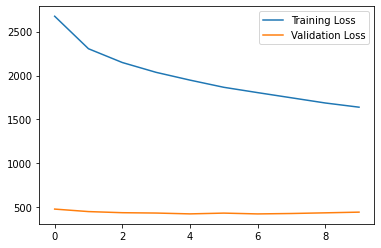

In [7]:
# Now let's train our network!
train_network_classification(mlp, train_loader, test_loader)

## Regression Tasks
In a regession task, we'll need to think about something else -- our same model may not work! 
For this task, we'll use the [California Housing Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html).

Again, if you get stuck on your choices of activation function, check out [the documentation](https://pytorch.org/docs/stable/nn.functional.html#non-linear-activation-functions).
This network looks a bit different -- why do we not have an output function for this task?

In [8]:
# Load our data and split it into train and test sets
data, target = fetch_california_housing(return_X_y=True)
train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.3)

# Since we are using PyTorch, we need tensors!
train_x = torch.tensor(train_x, dtype=torch.float32)
test_x = torch.tensor(test_x, dtype=torch.float32)
train_y = torch.tensor(train_y, dtype=torch.float32)
test_y = torch.tensor(test_y, dtype=torch.float32)

# Then we convert those tensors to a TensorDataset
train_california = torch.utils.data.TensorDataset(train_x, train_y)
test_california = torch.utils.data.TensorDataset(test_x, test_y)

# And create our DataLoaders!
train_loader = DataLoader(train_california, batch_size=10, shuffle=True)
test_loader = DataLoader(test_california, batch_size=10)

In [9]:
class Housing_MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.hidden = nn.Linear(8, 2)
        self.prediction = nn.Linear(2, 1)

    def forward(self, x):
        x = self.activation(self.hidden(x))
        x = self.prediction(x)

        return x

# Do not change the name of your model or later cells may fail!
mlp = Housing_MLP()

/opt/conda/lib/python3.7/site-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/opt/conda/lib/python3.7/site-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/opt/conda/lib/python3.7/site-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, redu

Epoch 1 training loss: 236.66186
Epoch 1 validation loss: 100.93978
Epoch 2 training loss: 248.91068
Epoch 2 validation loss: 172.19077
Epoch 3 training loss: 234.78283
Epoch 3 validation loss: 168.75674
Epoch 4 training loss: 248.08994
Epoch 4 validation loss: 172.19081
Epoch 5 training loss: 235.53727
Epoch 5 validation loss: 187.77227
Epoch 6 training loss: 225.59632
Epoch 6 validation loss: 100.93982
Epoch 7 training loss: 247.44481
Epoch 7 validation loss: 94.44201
Epoch 8 training loss: 250.83294
Epoch 8 validation loss: 157.49454
Epoch 9 training loss: 249.51427
Epoch 9 validation loss: 94.44202
Epoch 10 training loss: 249.76188
Epoch 10 validation loss: 90.29993


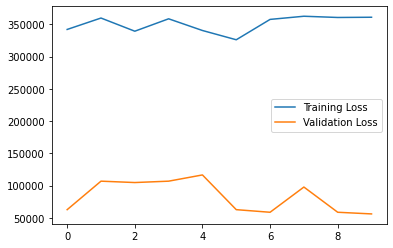

In [10]:
# Now let's train our network!
train_network_regression(mlp, train_loader, test_loader)

Great work! Go back and try different activation and output functions throughout and see how it affects your results.